<a href="https://colab.research.google.com/github/edisonc57/neftepromyslovyye-zhidkosti-s-ispol-zovaniyem-Python/blob/main/%D0%92%D1%8F%D0%B7%D0%BA%D0%BE%D1%81%D1%82%D1%8C_%D0%B3%D0%B0%D0%B7%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.20106818e-02 1.95454546e-06]
la relación lineal entre la variable real y la ajustada es de   0.9951890788590632


Text(0.5, 1.0, 'p vs Mug')

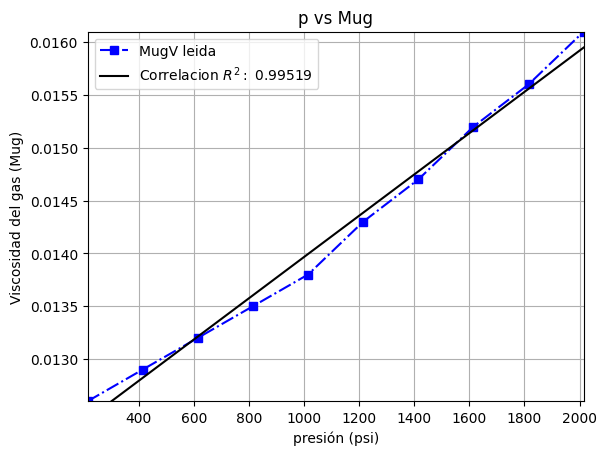

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

datos= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datos_01.xlsx', sheet_name= "Hoja1")
press= np.array (datos["Presión [psia]"])
MugV= np.array(datos["Mug [cp]"])

def fit_fuction(x, a, b):
  return a+ b*x 

p_adjust, p_cov= curve_fit(fit_fuction, press, MugV)
print(p_adjust)

R2= np.corrcoef(MugV, fit_fuction(press,*p_adjust))[0,1]
print('la relación lineal entre la variable real y la ajustada es de  ',  R2)

plt.figure("Datos Mugv")
plt.plot(press, MugV, '-.bs', label= 'MugV leida')
plt.plot(press, fit_fuction(press,*p_adjust), '-k',label='Correlacion $R^{2}:$ %s'% str(round(R2,5)) )
plt.xlim(np.min(press), (np.max(press)))
plt.ylim(np.min(MugV), (np.max(MugV)))
plt.xlabel('presión (psi)')
plt.ylabel('Viscosidad del gas (Mug)')
plt.legend(loc=0)
plt.grid()
plt.title('p vs Mug')

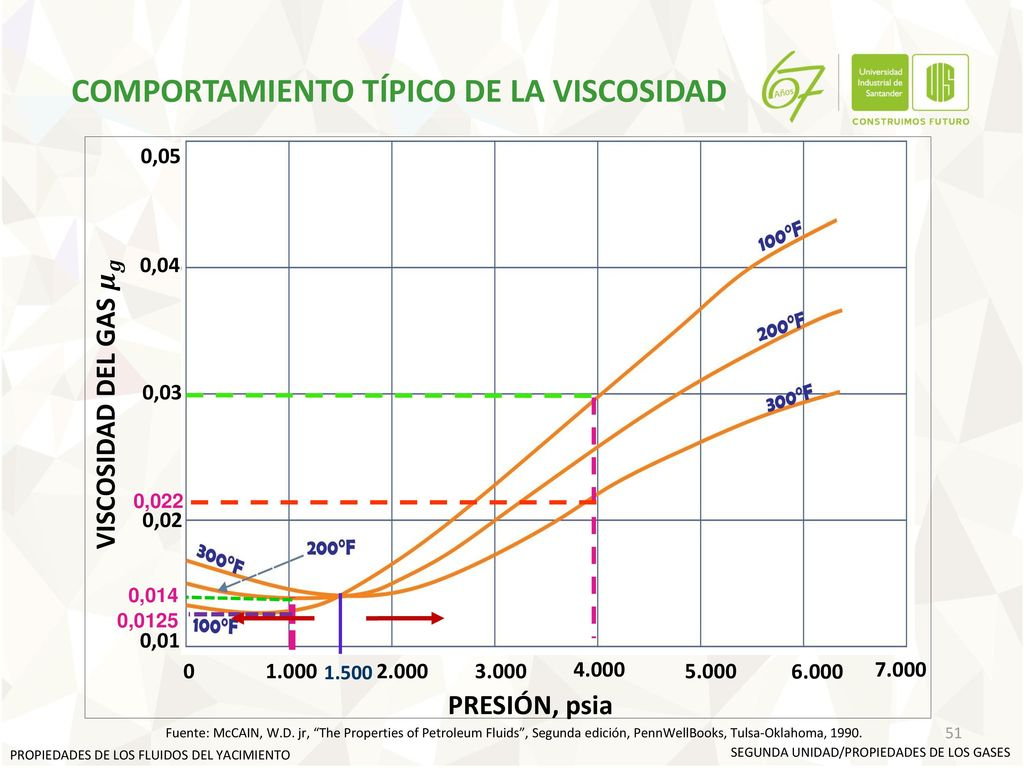

Text(0.5, 1.0, 'P vs Mugv')

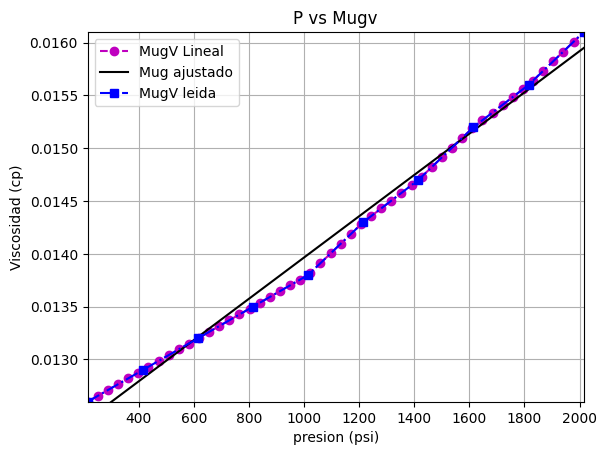

In [56]:
pres_new = np.linspace(np.min(press), np.max(press), 50)
MugV_il= np.interp(pres_new, press, MugV)
plt.plot(pres_new, MugV_il, '--mo', label = "MugV Lineal")
plt.plot(press, fit_fuction(press,*p_adjust), '-k', label= 'Mug ajustado' )
plt.plot(press, MugV, '-.bs', label= 'MugV leida')
plt.xlim((np.min(press), np.max(press)))
plt.ylim((np.min(MugV), np.max(MugV)))
plt.xlabel('presion (psi)')
plt.ylabel('Viscosidad (cp)')
plt.legend(loc=0)
plt.grid()
plt.title('P vs Mugv')